In [226]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import os

# Reading the data file
df = pd.read_csv("phishing_website_dataset.csv")

# Finding the size of the dataset
print(df.shape)

# Loading the data from the dataset
df.head()

(188637, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,...,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,...,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,...,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,...,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,...,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,...,34,72,1,85,1


In [227]:
# Loading the features of the dataset
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [228]:
#Information on the dataset
df.info

<bound method DataFrame.info of            FILENAME                                                URL  \
0        521848.txt                   https://www.southbankmosaics.com   
1         31372.txt                           https://www.uni-mainz.de   
2        597387.txt                     https://www.voicefmradio.co.uk   
3        554095.txt                        https://www.sfnmjournal.com   
4        151578.txt                 https://www.rewildingargentina.org   
...             ...                                                ...   
188632   179093.txt                    https://www.life-in-ecuador.com   
188633    77185.txt                      https://www.winchester.gov.uk   
188634   622132.txt                    https://www.nononsensedesign.be   
188635  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
188636   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
0        

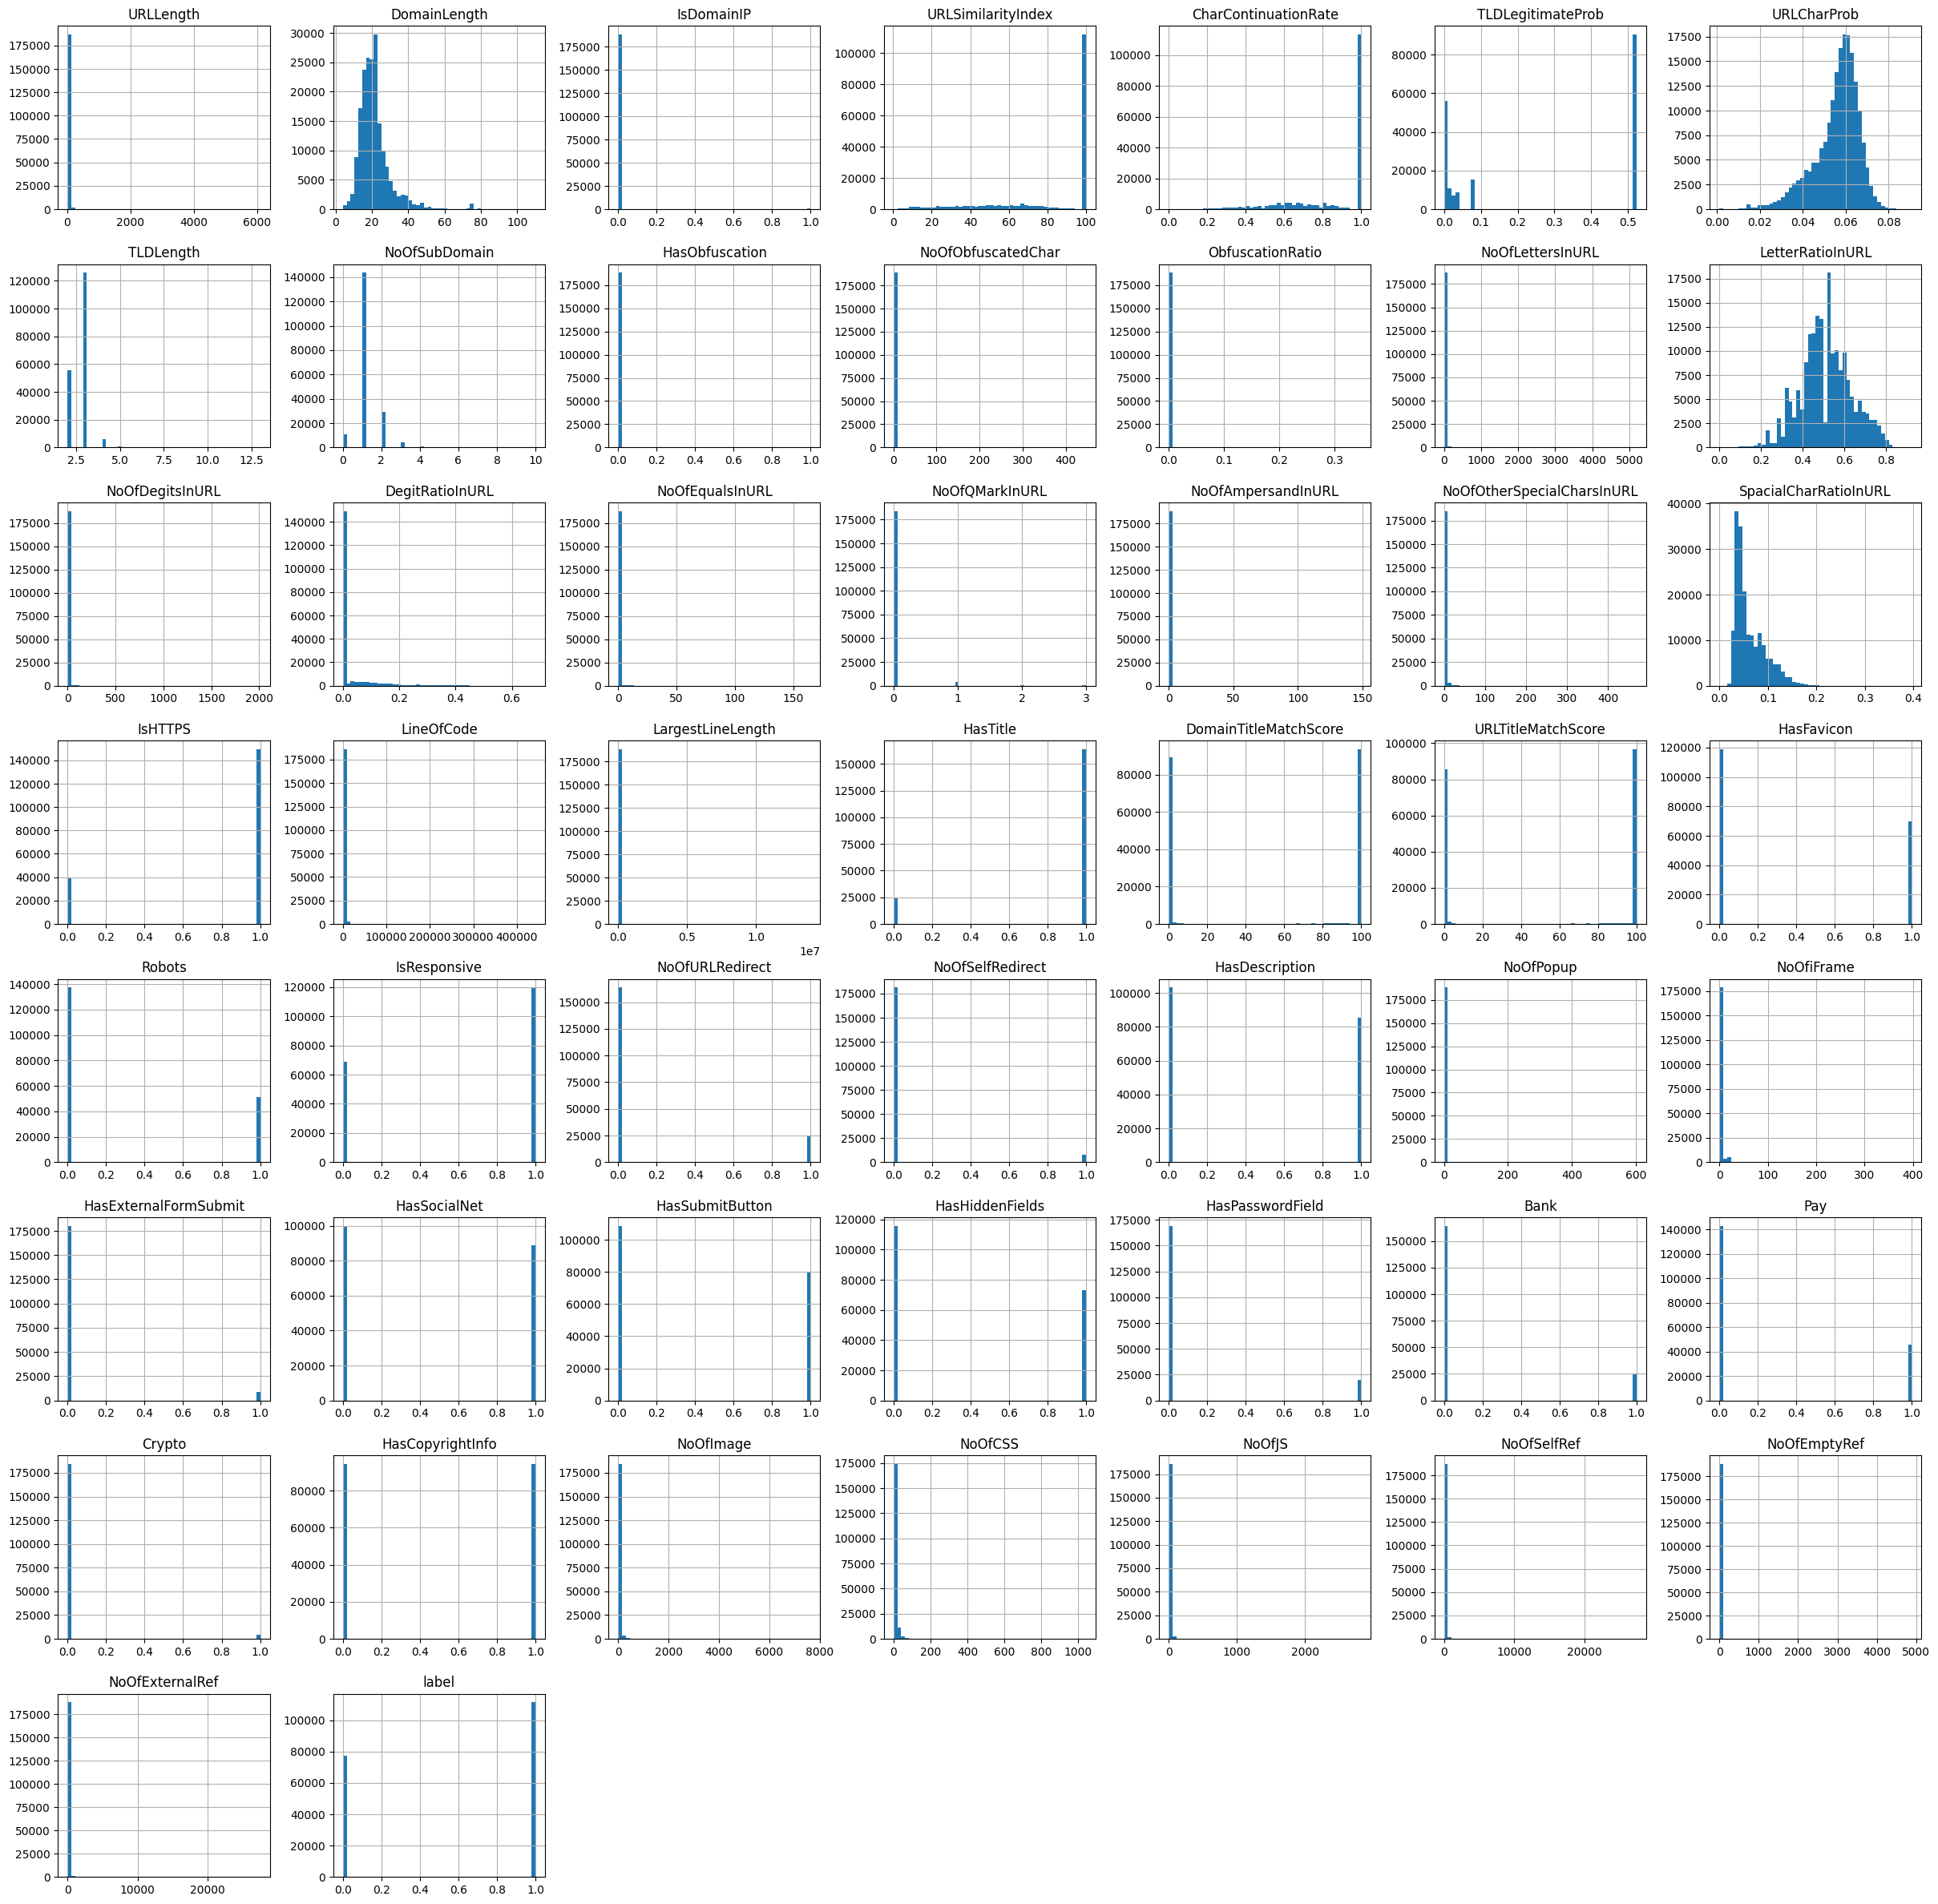

In [229]:
# Visualizing the given data to get familiarized with it
df.hist(bins = 50, figsize = (30, 30))
plt.show()

In [230]:
# Dropping Domain, FILENAME, URL, Title and TLD columns as we don't want string data type and numerical datatype together
# as it may cause problem later on
df1 = df.drop(['Domain', 'FILENAME', 'URL', 'Title', 'TLD'], axis = 1).copy()

In [231]:
# Searching for data with missing/null values
df1.isnull().sum()

URLLength                     0
DomainLength                  0
IsDomainIP                    0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive                  0
NoOfURLRedirect               0
NoOfSelf

In [232]:
# Shuffling the data in dataset to make it easier to split the train and test dataset. 
df1 = df1.sample(frac=1).reset_index(drop=True)
df1.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,28,22,0,77.582846,1.000000,0.522907,0.064997,3,1,0,...,0,0,0,0,0,1,1,0,1,0
1,29,22,0,100.000000,1.000000,0.522907,0.066559,3,1,0,...,0,0,1,14,1,3,34,0,47,1
2,23,16,0,100.000000,1.000000,0.522907,0.062508,3,1,0,...,0,0,1,125,6,10,27,1,39,1
3,98,11,0,10.176096,0.714286,0.522907,0.033626,3,0,0,...,1,0,0,0,2,3,0,1,3,0
4,20,13,0,100.000000,1.000000,0.079963,0.076749,3,1,0,...,0,0,1,6,5,6,29,0,19,1


In [233]:
# Seperating and assigning the features and target columns to X and y
X = df1.drop('label', axis = 1)
y = df1['label']
X.shape, y.shape

((188637, 50), (188637,))

In [234]:
# Splitting the dataset into training and testing data sets in the ratio 85:15 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 32)
X_train.shape, X_test.shape

((160341, 50), (28296, 50))

In [235]:
# DecisionTreeClassifier Model
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(max_depth = 7)

# Fitting of the model
t.fit(X_train, y_train)

# Predicting the target value from the model of samples
y_train_tree = t.predict(X_train)
y_test_tree = t.predict(X_test)

In [236]:
# Calculating the accuracy score of training and testing sets
accScTrainTree = accuracy_score(y_train, y_train_tree)
accScTestTree = accuracy_score(y_test, y_test_tree)

precScTrainTree = precision_score(y_train, y_train_tree)
precScTestTree = precision_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(accScTrainTree))
print("Decision Tree: Accuracy on test Data: {:.3f}\n".format(accScTestTree))
print("Decision Tree: Precision on training Data: {:.3f}".format(precScTrainTree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precScTestTree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000

Decision Tree: Precision on training Data: 1.000
Decision Tree: Precision on test Data: 1.000


In [237]:
# Linear Regression model
from sklearn.linear_model import LinearRegression as LR

model_lr = LR()

# Fitting the model
model_lr.fit(X_train, y_train)

# Predicting the target value from the model of samples
y_train_lr = model_lr.predict(X_train)
y_test_lr = model_lr.predict(X_test)

In [239]:
# Calculating the accuracy score of training and testing sets
from sklearn.metrics import mean_squared_error as mse, r2_score as r2s

mseTrainLR = mse(y_train, y_train_lr)
mseTestLR = mse(y_test, y_test_lr)

r2sTrainLR = r2s(y_train, y_train_lr)
r2sTestLR = r2s(y_test, y_test_lr)

print("Linear Regression: Mean squared error on training Data: {:.3f}".format(mseTrainLR))
print("Linear Regression: Mean squared error on test Data: {:.3f}\n".format(mseTestLR))
print("Linear Regression: R2 score on training Data: {:.3f}".format(r2sTrainLR))
print("Linear Regression: R2 score on test Data: {:.3f}".format(r2sTestLR))

Linear Regression: Mean squared error on training Data: 0.017
Linear Regression: Mean squared error on test Data: 0.017

Linear Regression: R2 score on training Data: 0.928
Linear Regression: R2 score on test Data: 0.928
